- **EDA STARBUCKS**

In [3]:
import pandas as pd

# Cargar el dataframe
merged_df = pd.read_parquet('merged_starbucks_reviews_with_state.parquet')

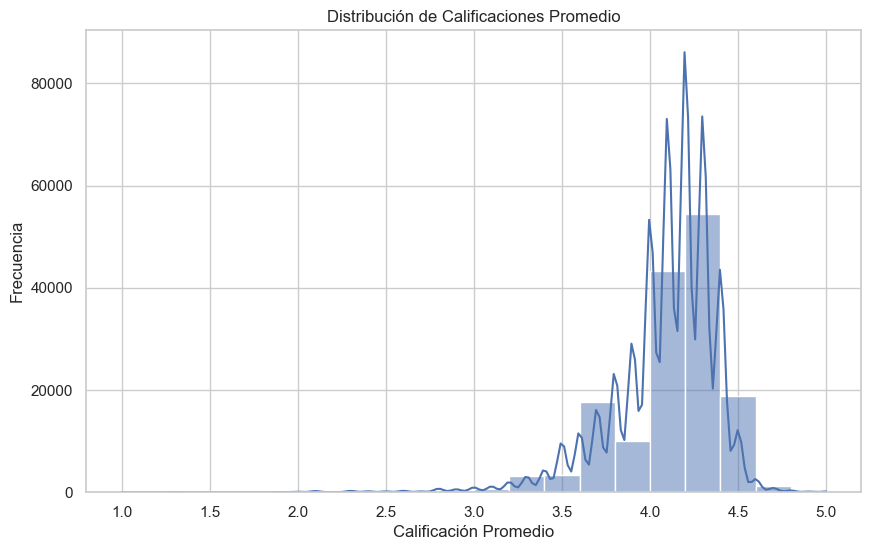

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración de estilo para los gráficos
sns.set(style='whitegrid')

# Columnas importantes para el análisis
important_columns = ['avg_rating', 'num_of_reviews', 'price', 'state', 'rating']

# Exploración de la distribución de las calificaciones promedio
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['avg_rating'], bins=20, kde=True)
plt.title('Distribución de Calificaciones Promedio')
plt.xlabel('Calificación Promedio')
plt.ylabel('Frecuencia')
plt.show()

- **La mayoría de las calificaciones promedio se concentran alrededor de 3.5 a 4.5, lo que indica que la mayoría de las tiendas Starbucks tienen una calificación bastante buena.**

In [5]:
# Verifique los tipos de datos para identificar posibles problemas con la agregación
merged_df.dtypes

# Intentar agrupar por 'GMAP_ID' y agregue las columnas restantes tomando valores únicos

df_agrupados = merged_df.groupby('gmap_id').agg(lambda x: x.drop_duplicates().tolist() if pd.api.types.is_object_dtype(x) else x.unique().tolist()).reset_index()

# Display the first few rows of the grouped dataframe
df_agrupados.head()

,gmap_id,name_x,address,description,latitude,longitude,category,avg_rating,num_of_reviews,price,...,relative_results,url,user_id,name_y,time,rating,text,pics,resp,state
0,0x4cb204000ffe30e5:0xa7ac14186a5f5a6e,[Starbucks],"[Starbucks, 274 Western Ave, Augusta, ME 04330...",[Seattle-based coffeehouse chain known for its...,[44.314715],[-69.804681],"[[Coffee shop, Breakfast restaurant, Cafe, Cof...",[4.1],[448],[$$],...,"[[0x4cb203d84bd033bb:0x9bad233af6634b65, 0x4cb...",[https://www.google.com/maps/place//data=!4m2!...,"[1.0668323175901207e+20, 1.069639953355044e+20...","[Brooke Jansen, Chelsie Boynton, VintageClassi...","[1612204747614.0, 1619089647564.0, 16161248336...","[5.0, 1.0, 3.0, 4.0, 2.0]",[100% worth it to get my dog a pupaccino. New ...,[[{'url': ['https://lh5.googleusercontent.com/...,[None],[ME]
1,0x4cb206a9e6afff7f:0x4cd3e00632f903cd,[Starbucks],"[Starbucks, 43 Crossing Way, Augusta, ME 04330]",[Seattle-based coffeehouse chain known for its...,[44.310145999999996],[-69.80653],"[[Coffee shop, Cafe, Coffee store, Espresso ba...",[3.8],[48],[$$],...,"[[0x4cb203d84bd033bb:0x9bad233af6634b65, 0x4cb...",[https://www.google.com/maps/place//data=!4m2!...,"[1.182155839412926e+20, 1.1665151469224237e+20...","[Marcia Kay, Shirley Ayala, Aubrey Knorr, Troy...","[1618967354769.0, 1531011826158.0, 15310773679...","[5.0, 4.0, 1.0, 2.0, 3.0]",[I have never had a bad experience at this Sta...,"[None, [{'url': ['https://lh5.googleuserconten...",[None],[ME]
2,0x4cb298b49db8e7d7:0x511c14c2cef94af1,[Starbucks],"[Starbucks, 210 US-1, Scarborough, ME 04074]",[Seattle-based coffeehouse chain known for its...,[43.591482],[-70.330925],"[[Coffee shop, Breakfast restaurant, Cafe, Cof...",[4.2],[206],[$$],...,"[[0x4cb298aff67347f3:0x48c7374341f467c0, 0x4cb...",[https://www.google.com/maps/place//data=!4m2!...,"[1.1109110576249507e+20, 1.1051074420602208e+2...","[Seth Reynolds, Heather Rose Nelson, alan bark...","[1540141860989.0, 1573758450137.0, 16216920892...","[3.0, 5.0, 4.0, 1.0, 2.0]",[I come here relatively often- only because of...,[[{'url': ['https://lh5.googleusercontent.com/...,[None],[ME]
3,0x4cb29b3d3824e409:0x2a73a5ecc700b03c,[Starbucks],"[Starbucks, 91 Auburn St, Portland, ME 04103]",[Seattle-based coffeehouse chain known for its...,[43.70276],[-70.288539],"[[Coffee shop, Breakfast restaurant, Cafe, Cof...",[4.1],[113],[$$],...,"[[0x4cb29c6e8e0ad67d:0x16b2cb35f458f92, 0x4cb2...",[https://www.google.com/maps/place//data=!4m2!...,"[1.1323941016052744e+20, 1.0281433029506933e+2...","[Jasin, Jo-Nell Martin, Avik Dutta, Arron Veys...","[1617464961768.0, 1614976691855.0, 15207204147...","[5.0, 4.0, 1.0, 2.0, 3.0]","[Great staff, very personable and friendly. I ...","[None, [{'url': ['https://lh5.googleuserconten...",[None],[ME]
4,0x4cb29f0baa70cc2b:0xdd1eb4468b30b9f5,[Starbucks],"[Starbucks, 50 Market St, South Portland, ME 0...",[Seattle-based coffeehouse chain known for its...,[43.635334],[-70.255585],"[[Coffee shop, Breakfast restaurant, Cafe, Cof...",[4.2],[68],[$$],...,[None],[https://www.google.com/maps/place//data=!4m2!...,"[1.0273728290155438e+20, 1.0980899995281002e+2...","[David Kellogg, Kelly Turner, Kurt Otterstein,...","[1616619023941.0, 1618980404926.0, 16166342610...","[5.0, 2.0, 4.0, 3.0, 1.0]",[We loved our coffees. They were made just rig...,[None],[None],[ME]


In [6]:
# Asegúrese de que todos los valores en las columnas especificadas sean cadenas y luego retire los soportes correctamente
columnas_a_limpiar = ['name_x', 'address', 'description', 'latitude', 'longitude', 'avg_rating','name_y','state','text','num_of_reviews', 'price', 'url', 'state']
for column in columnas_a_limpiar:
    df_agrupados[column] = df_agrupados[column].astype(str).str.replace(r'^\[|\]$', '', regex=True)

# Verificar los cambios
for column in columnas_a_limpiar:
    print('Column:', column)
    print(df_agrupados[column].head(10))
    print('\
')

Column: name_x
0    'Starbucks'
1    'Starbucks'
2    'Starbucks'
3    'Starbucks'
4    'Starbucks'
5    'Starbucks'
6    'Starbucks'
7    'Starbucks'
8    'Starbucks'
9    'Starbucks'
Name: name_x, dtype: object

Column: address
0    'Starbucks, 274 Western Ave, Augusta, ME 04330...
1      'Starbucks, 43 Crossing Way, Augusta, ME 04330'
2         'Starbucks, 210 US-1, Scarborough, ME 04074'
3        'Starbucks, 91 Auburn St, Portland, ME 04103'
4    'Starbucks, 50 Market St, South Portland, ME 0...
5     'Starbucks, 19 Centre Dr, Plattsburgh, NY 12901'
6    'Starbucks, 18 Lower Mountain View Dr, Colches...
7    'Starbucks, 595 Shelburne Rd, Burlington, VT 0...
8    'Starbucks, 155 Dorset St, South Burlington, V...
9    'Starbucks, 1138 3 Mile Rd, Sault Ste. Marie, ...
Name: address, dtype: object

Column: description
0    'Seattle-based coffeehouse chain known for its...
1    'Seattle-based coffeehouse chain known for its...
2    'Seattle-based coffeehouse chain known for its...
3    

In [7]:
df_agrupados.head()

,gmap_id,name_x,address,description,latitude,longitude,category,avg_rating,num_of_reviews,price,...,relative_results,url,user_id,name_y,time,rating,text,pics,resp,state
0,0x4cb204000ffe30e5:0xa7ac14186a5f5a6e,'Starbucks',"'Starbucks, 274 Western Ave, Augusta, ME 04330...",'Seattle-based coffeehouse chain known for its...,44.314715,-69.804681,"[[Coffee shop, Breakfast restaurant, Cafe, Cof...",4.1,448,'$$',...,"[[0x4cb203d84bd033bb:0x9bad233af6634b65, 0x4cb...",'https://www.google.com/maps/place//data=!4m2!...,"[1.0668323175901207e+20, 1.069639953355044e+20...","'Brooke Jansen', 'Chelsie Boynton', 'VintageCl...","[1612204747614.0, 1619089647564.0, 16161248336...","[5.0, 1.0, 3.0, 4.0, 2.0]","""100% worth it to get my dog a pupaccino. New ...",[[{'url': ['https://lh5.googleusercontent.com/...,[None],'ME'
1,0x4cb206a9e6afff7f:0x4cd3e00632f903cd,'Starbucks',"'Starbucks, 43 Crossing Way, Augusta, ME 04330'",'Seattle-based coffeehouse chain known for its...,44.310145999999996,-69.80653,"[[Coffee shop, Cafe, Coffee store, Espresso ba...",3.8,48,'$$',...,"[[0x4cb203d84bd033bb:0x9bad233af6634b65, 0x4cb...",'https://www.google.com/maps/place//data=!4m2!...,"[1.182155839412926e+20, 1.1665151469224237e+20...","'Marcia Kay', 'Shirley Ayala', 'Aubrey Knorr',...","[1618967354769.0, 1531011826158.0, 15310773679...","[5.0, 4.0, 1.0, 2.0, 3.0]","""I have never had a bad experience at this Sta...","[None, [{'url': ['https://lh5.googleuserconten...",[None],'ME'
2,0x4cb298b49db8e7d7:0x511c14c2cef94af1,'Starbucks',"'Starbucks, 210 US-1, Scarborough, ME 04074'",'Seattle-based coffeehouse chain known for its...,43.591482,-70.330925,"[[Coffee shop, Breakfast restaurant, Cafe, Cof...",4.2,206,'$$',...,"[[0x4cb298aff67347f3:0x48c7374341f467c0, 0x4cb...",'https://www.google.com/maps/place//data=!4m2!...,"[1.1109110576249507e+20, 1.1051074420602208e+2...","'Seth Reynolds', 'Heather Rose Nelson', 'alan ...","[1540141860989.0, 1573758450137.0, 16216920892...","[3.0, 5.0, 4.0, 1.0, 2.0]",'I come here relatively often- only because of...,[[{'url': ['https://lh5.googleusercontent.com/...,[None],'ME'
3,0x4cb29b3d3824e409:0x2a73a5ecc700b03c,'Starbucks',"'Starbucks, 91 Auburn St, Portland, ME 04103'",'Seattle-based coffeehouse chain known for its...,43.70276,-70.288539,"[[Coffee shop, Breakfast restaurant, Cafe, Cof...",4.1,113,'$$',...,"[[0x4cb29c6e8e0ad67d:0x16b2cb35f458f92, 0x4cb2...",'https://www.google.com/maps/place//data=!4m2!...,"[1.1323941016052744e+20, 1.0281433029506933e+2...","'Jasin', 'Jo-Nell Martin', 'Avik Dutta', 'Arro...","[1617464961768.0, 1614976691855.0, 15207204147...","[5.0, 4.0, 1.0, 2.0, 3.0]","'Great staff, very personable and friendly. I ...","[None, [{'url': ['https://lh5.googleuserconten...",[None],'ME'
4,0x4cb29f0baa70cc2b:0xdd1eb4468b30b9f5,'Starbucks',"'Starbucks, 50 Market St, South Portland, ME 0...",'Seattle-based coffeehouse chain known for its...,43.635334,-70.255585,"[[Coffee shop, Breakfast restaurant, Cafe, Cof...",4.2,68,'$$',...,[None],'https://www.google.com/maps/place//data=!4m2!...,"[1.0273728290155438e+20, 1.0980899995281002e+2...","'David Kellogg', 'Kelly Turner', 'Kurt Otterst...","[1616619023941.0, 1618980404926.0, 16166342610...","[5.0, 2.0, 4.0, 3.0, 1.0]","""We loved our coffees. They were made just rig...",[None],[None],'ME'


In [28]:
# Realizar un análisis estadístico según la columna "state" y el número de reseñas
estadisticas_estado = df_agrupados.groupby('state').size().reset_index(name='num_reviews')

# Mostrar las primeras filas del resultado
print(estadisticas_estado.head())

# Descripción estadística del número de reseñas por estado
description = estadisticas_estado['num_reviews'].describe()
print(description)

  state  num_reviews
0  'AK'           22
1  'AL'           18
2  'AR'           18
3  'AZ'          130
4  'CA'          627
count     52.000000
mean      66.903846
std       95.614065
min        1.000000
25%       15.500000
50%       37.000000
75%       84.750000
max      627.000000
Name: num_reviews, dtype: float64


- Distribución de Reseñas por Estado: 

La mayoría de los estados tienen un número bajo de reseñas, con una mediana de 2 reseñas por estado. Sin embargo, hay algunos estados con un número significativamente mayor de reseñas, como se observa en el valor máximo de 496 reseñas.

- Estadísticas Descriptivas:

Media:El número promedio de reseñas por estado es aproximadamente 16.49.
Desviación Estándar: La desviación estándar es bastante alta (57.36), lo que indica una gran variabilidad en el número de reseñas entre los estados.
Percentiles: El 25% de los estados tienen 1 o menos reseñas, el 50% tienen 2 o menos, y el 75% tienen 8 o menos reseñas.

In [18]:
df_agrupados.to_parquet('merged_starbucks_reviews_con_state_agrupados.parquet')

In [41]:
import pandas as pd

# Cargar el archivo parquet
merged_df = pd.read_parquet('merged_starbucks_reviews_con_state_agrupados.parquet')

# Convertir la columna 'num_of_reviews' a tipo numérico
merged_df['num_of_reviews'] = pd.to_numeric(merged_df['num_of_reviews'], errors='coerce')

# Crear rangos para el número de reseñas
bins = [0, 10, 50, 100, 500, 1000, float('inf')]
labels = ['0-10', '11-50', '51-100', '101-500', '501-1000', '1000+']
merged_df['review_range'] = pd.cut(merged_df['num_of_reviews'], bins=bins, labels=labels, right=False)

# Mostrar las primeras filas del dataframe con la nueva columna
print(merged_df.head())

# Guardar el dataframe modificado
merged_df.to_parquet('merged_starbucks_reviews_con_state_agrupados_con_rangos_de_reviews.parquet')

print("Rangos creados y archivo guardado como 'merged_starbucks_reviews_con_state_agrupados_con_rangos_de_reviews.parquet'")

                                 gmap_id       name_x  \
0  0x4cb204000ffe30e5:0xa7ac14186a5f5a6e  'Starbucks'   
1  0x4cb206a9e6afff7f:0x4cd3e00632f903cd  'Starbucks'   
2  0x4cb298b49db8e7d7:0x511c14c2cef94af1  'Starbucks'   
3  0x4cb29b3d3824e409:0x2a73a5ecc700b03c  'Starbucks'   
4  0x4cb29f0baa70cc2b:0xdd1eb4468b30b9f5  'Starbucks'   

                                             address  \
0  'Starbucks, 274 Western Ave, Augusta, ME 04330...   
1    'Starbucks, 43 Crossing Way, Augusta, ME 04330'   
2       'Starbucks, 210 US-1, Scarborough, ME 04074'   
3      'Starbucks, 91 Auburn St, Portland, ME 04103'   
4  'Starbucks, 50 Market St, South Portland, ME 0...   

                                         description            latitude  \
0  'Seattle-based coffeehouse chain known for its...           44.314715   
1  'Seattle-based coffeehouse chain known for its...  44.310145999999996   
2  'Seattle-based coffeehouse chain known for its...           43.591482   
3  'Seattle-base

In [42]:
rangos_df = pd.read_parquet('merged_starbucks_reviews_con_state_agrupados_con_rangos_de_reviews.parquet')

In [46]:
import pandas as pd
import plotly.express as px


# Crear el gráfico con Plotly
fig = px.histogram(rangos_df, x='review_range', title='Distribución de los Rangos de Reseñas', labels={'review_range': 'Rango de Reseñas', 'count': 'Frecuencia'})

# Mejorar la estética del gráfico con fondo negro
fig.update_layout(
    title_font=dict(size=24, family='Arial, sans-serif', color='white'),
    xaxis_title_font=dict(size=18, family='Arial, sans-serif', color='white'),
    yaxis_title_font=dict(size=18, family='Arial, sans-serif', color='white'),
    xaxis_tickfont=dict(size=14, family='Arial, sans-serif', color='white'),
    yaxis_tickfont=dict(size=14, family='Arial, sans-serif', color='white'),
    bargap=0.2,
    yaxis_title='Frecuencia',
    plot_bgcolor='black',
    paper_bgcolor='black'
)

# Guardar el gráfico como HTML
fig.write_html('review_ranges_distribution_black_background.html')

# Mostrar el gráfico
fig.show()

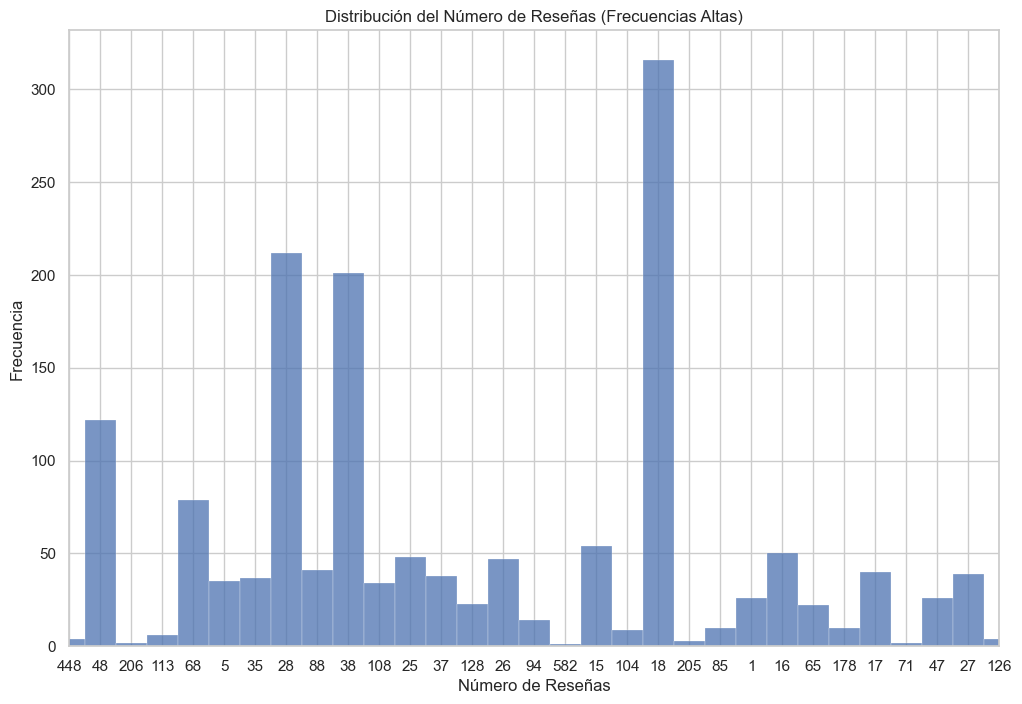

In [20]:
# Create a figure and axis
plt.figure(figsize=(12, 8))

# Plot the distribution of the number of reviews with a focus on the most frequent values
sns.histplot(df_agrupados['num_of_reviews'], bins=30, kde=False)

# Set the title and labels
plt.title('Distribución del Número de Reseñas (Frecuencias Altas)')
plt.xlabel('Número de Reseñas')
plt.ylabel('Frecuencia')

# Set x-axis limits to focus on the most frequent values
plt.xlim(0, 30)

# Show the plot
plt.show()

- **La mayoría de las tiendas tienen menos de 50 reseñas, con algunas excepciones que tienen un número significativamente mayor de reseñas.Entre todas las cantidades de reseñas posibles, 18 es la que se observa con mayor regularidad en las tiendas. Por lo tanto es la moda**

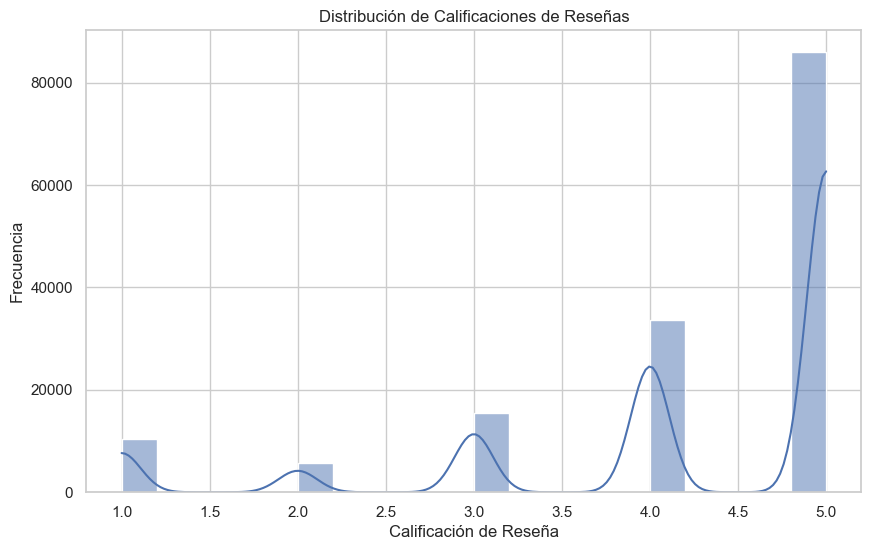

In [5]:
# Exploración de la distribución de calificaciones de reseñas
plt.figure(figsize=(10, 6))
sns.histplot(merged_df['rating'], bins=20, kde=True)
plt.title('Distribución de Calificaciones de Reseñas')
plt.xlabel('Calificación de Reseña')
plt.ylabel('Frecuencia')
plt.show()

- **Las calificaciones de las reseñas individuales también tienden a concentrarse en el rango de 3 a 5 estrellas, lo que sugiere una satisfacción general positiva entre los clientes.**

In [48]:
# Cargar el dataframe con la columna "estados"
merged_df = pd.read_parquet('merged_starbucks_reviews_with_state.parquet')

C:\Users\zimme\AppData\Local\Temp\ipykernel_23536\1927803221.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_estados.index, y=conteo_estados.values, palette='viridis')


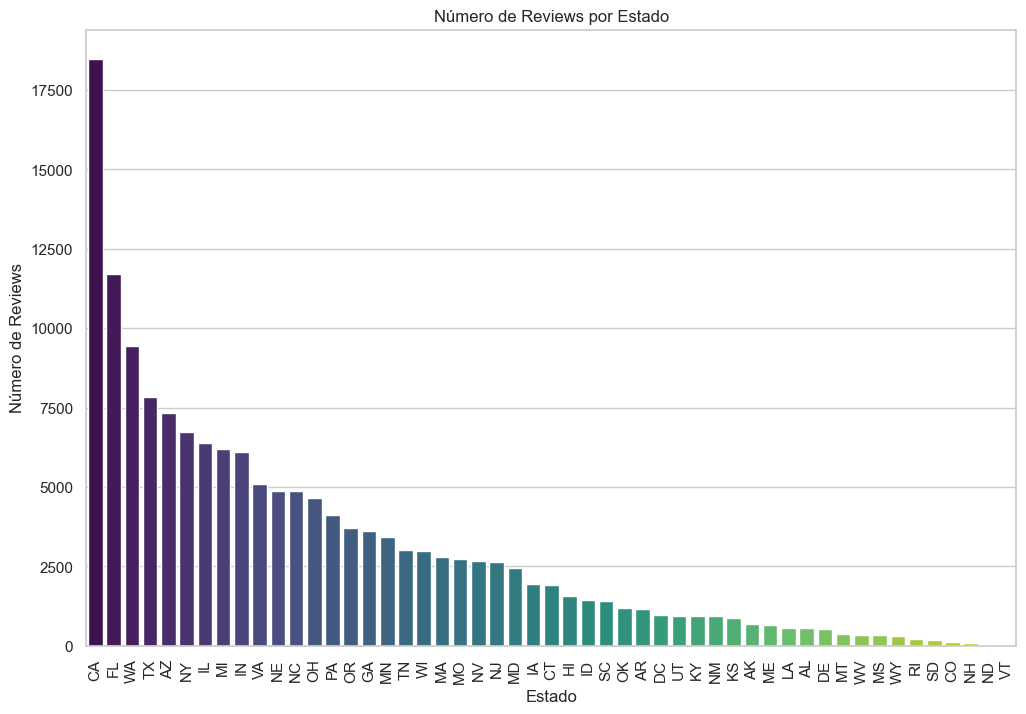

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

tqdm.pandas()


# Análisis Exploratorio de Datos centrado en la columna 'state'
# Contar el número de reviews por estado
conteo_estados = merged_df['state'].value_counts()

# Graficar el número de reviews por estado
plt.figure(figsize=(12, 8))
sns.barplot(x=conteo_estados.index, y=conteo_estados.values, palette='viridis')
plt.title('Número de Reviews por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Reviews')
plt.xticks(rotation=90)
plt.show()


- **La gráfica muestra la distribución del número de reviews por estado, con los nombres de los estados en el eje X. Se observa que algunos estados tienen una cantidad significativamente mayor de reviews en comparación con otros. Se puede examinar una cantidad significativamente mayor de reseñas en California en comparación con otros estados, superando los 17500.**

- **Surge la necesidad de ajustar la representación gráfica actual, ya que la distribución de las revisiones por estado refleja, en gran medida, la variación poblacional entre ellos. Para abordar esta situación, se propone normalizar los datos dividiendo el número de revisiones por estado por la cantidad de tiendas presentes en cada uno:**

C:\Users\zimme\AppData\Local\Temp\ipykernel_26876\3880157885.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=reviews_per_store.index, y=reviews_per_store.values, palette='viridis')


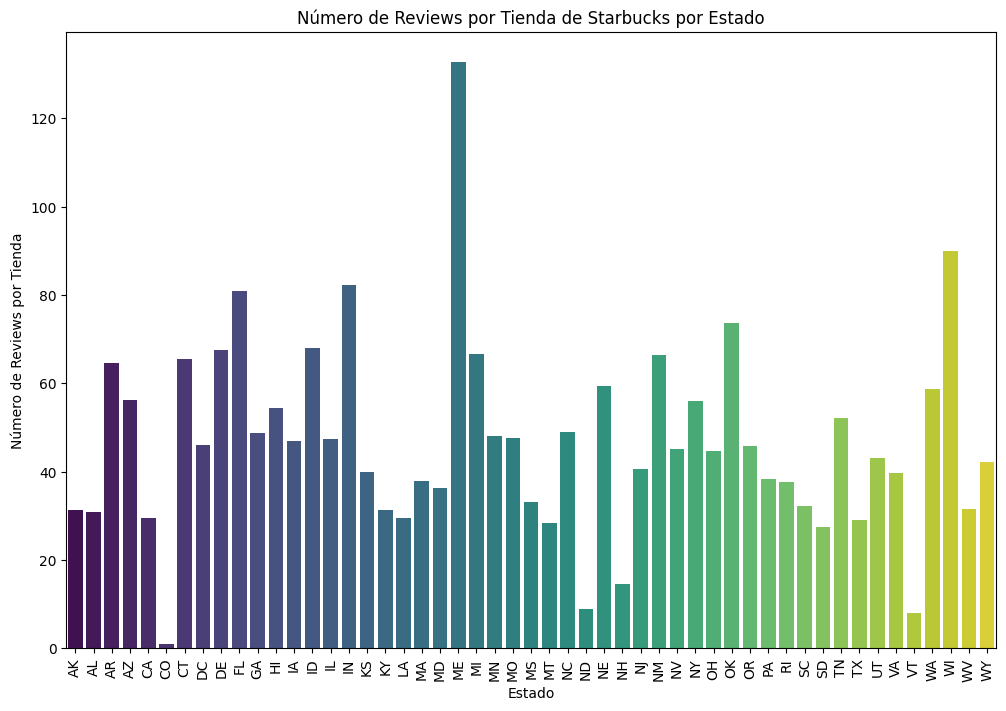

In [1]:
# Import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm

# Enable tqdm for pandas
tqdm.pandas()

# Load the dataset
merged_df = pd.read_parquet('merged_starbucks_reviews_with_state.parquet')

# Exploratory Data Analysis focused on the 'state' column
# Count the number of reviews per state
conteo_estados = merged_df['state'].value_counts()

# Count the number of unique stores (gmap_id) per state
store_count_per_state = merged_df.groupby('state')['gmap_id'].nunique()

# Calculate the number of reviews per store by state
reviews_per_store = conteo_estados / store_count_per_state

# Drop NaN values (if any)
reviews_per_store = reviews_per_store.dropna()

# Plot the number of reviews per store by state
plt.figure(figsize=(12, 8))
sns.barplot(x=reviews_per_store.index, y=reviews_per_store.values, palette='viridis')
plt.title('Número de Reviews por Tienda de Starbucks por Estado')
plt.xlabel('Estado')
plt.ylabel('Número de Reviews por Tienda')
plt.xticks(rotation=90)
plt.show()

- El gráfico muestra el promedio de reviews por tienda de Starbucks en cada estado. A continuación, algunas conclusiones clave basadas en este hecho:

Variabilidad entre Estados: Existe una variabilidad significativa en el promedio de reviews por tienda entre los diferentes estados. Algunos estados tienen un promedio mucho mayor de reviews por tienda en comparación con otros.

Estados con Mayor Promedio de Reviews por Tienda: Estados como California, Texas y Nueva York parecen tener un mayor promedio de reviews por tienda, lo que podría indicar una mayor actividad de los clientes en términos de dejar opiniones.

Estados con Menor Promedio de Reviews por Tienda: Por otro lado, hay estados con un promedio relativamente bajo de reviews por tienda, lo que podría sugerir una menor participación de los clientes en esos lugares.

Factores Potenciales: Las diferencias en el promedio de reviews por tienda podrían deberse a varios factores, como la densidad de población, la cultura de dejar opiniones en línea, la calidad del servicio, y la cantidad de tiendas en cada estado.

Oportunidades de Mejora: Los estados con un menor promedio de reviews por tienda podrían representar una oportunidad para Starbucks de incentivar a los clientes a dejar más opiniones, lo que podría proporcionar valiosa retroalimentación para mejorar el servicio.

En resumen, el análisis del promedio de reviews por tienda de Starbucks por estado revela patrones interesantes de participación de los clientes que podrían ser útiles para estrategias de marketing y mejora del servicio.

In [52]:

# Este código calcula la proporción de reviews por estado y genera un gráfico de barras con Plotly con fondo negro.

import pandas as pd
import plotly.express as px
from tqdm import tqdm

tqdm.pandas()

# Cargar el DataFrame con los reviews
merged_df = pd.read_parquet('merged_starbucks_reviews_with_state.parquet')

# Contar el número de reviews por estado
conteo_estados = merged_df['state'].value_counts().reset_index()
conteo_estados.columns = ['state', 'num_reviews']

# Calcular las proporciones de reviews por estado
conteo_estados['proportion_reviews'] = conteo_estados['num_reviews'] / conteo_estados['num_reviews'].sum()

# Graficar las proporciones con Plotly
fig = px.bar(conteo_estados, x='state', y='proportion_reviews', title='Proporción de Reviews por Estado', labels={'state': 'Estado', 'proportion_reviews': 'Proporción de Reviews'}, color_discrete_sequence=['#1f77b4'])
fig.update_layout(xaxis={'categoryorder':'total descending'}, plot_bgcolor='black', paper_bgcolor='black', font_color='white')
fig.show()

- **Distribución de Reviews: El gráfico muestra la proporción de reviews por estado, lo que permite visualizar qué estados tienen una mayor o menor participación en términos de reviews.**

In [49]:
# Este código calcula el promedio de 'avg_rating' por cada estado y genera un gráfico con Plotly.

import pandas as pd
import plotly.express as px
from tqdm import tqdm

tqdm.pandas()


# Calcular el promedio de 'avg_rating' por cada estado
avg_rating_by_state = merged_df.groupby('state')['avg_rating'].mean().reset_index()

# Graficar el promedio de 'avg_rating' por cada estado
fig = px.bar(avg_rating_by_state, x='state', y='avg_rating', title='Promedio de Rating por Estado', labels={'state': 'Estado', 'avg_rating': 'Promedio de Rating'})
fig.update_layout(xaxis={'categoryorder':'total descending'})
fig.show()

- **El análisis del gráfico revela una variabilidad moderada en las calificaciones promedio de las tiendas Starbucks por estado. Si bien todas las regiones presentan calificaciones elevadas, no se observan diferencias significativas entre ellas.**

- **EDA STARBUCKS Y DUNKIN(PRINCIPAL COMPETENCIA)**

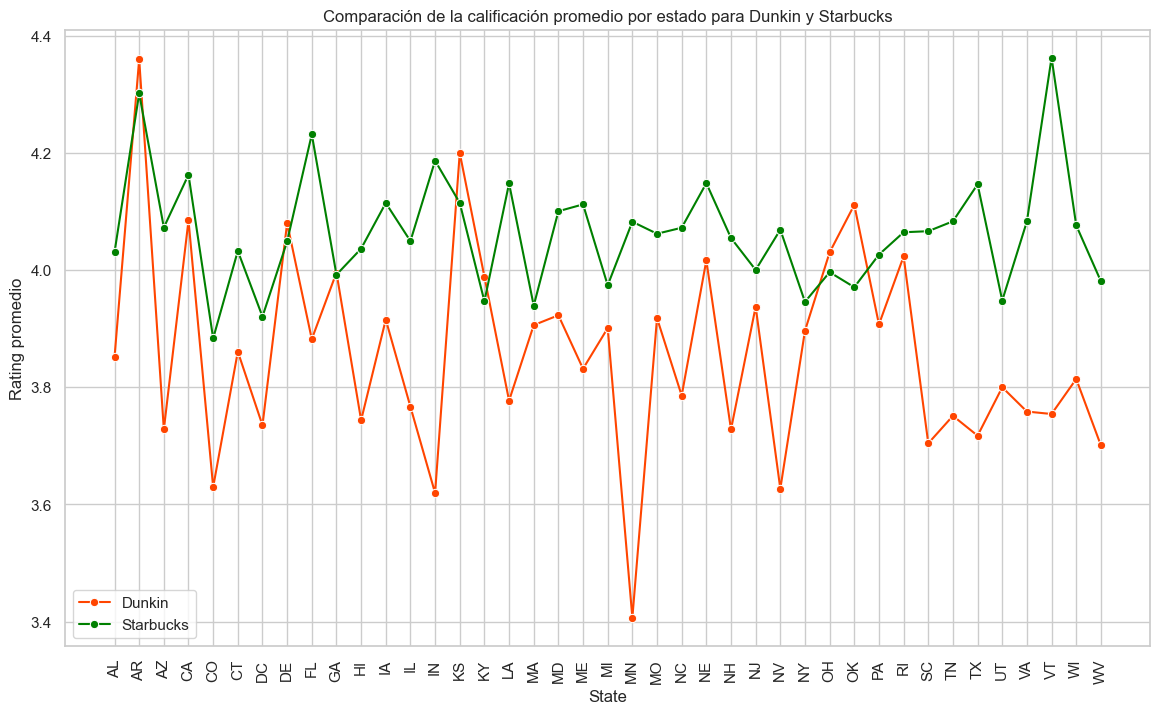

In [50]:
# Importar las bibliotecas necesarias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar los archivos parquet
df_dunkin = pd.read_parquet('dunkin_google_con_state.parquet')
df_merged = pd.read_parquet('merged_starbucks_reviews_with_state.parquet')

# Agrupar por estado y calcular la media de las calificaciones
df_dunkin_avg = df_dunkin.groupby('state')['avg_rating'].mean().reset_index()
df_merged_avg = df_merged.groupby('state')['avg_rating'].mean().reset_index()

# Renombrar las columnas para diferenciarlas
df_dunkin_avg.columns = ['state', 'avg_rating_dunkin']
df_merged_avg.columns = ['state', 'avg_rating_starbucks']

# Unir los dos dataframes en uno solo
df_avg_combined = pd.merge(df_dunkin_avg, df_merged_avg, on='state', how='outer').fillna(0)

# Filtrar los estados que tienen registros de Dunkin
df_avg_combined_filtered = df_avg_combined[df_avg_combined['avg_rating_dunkin'] > 0]

# Crear el gráfico de líneas
plt.figure(figsize=(14, 8))

# Crear el gráfico de líneas
sns.lineplot(x='state', y='avg_rating_dunkin', data=df_avg_combined_filtered, marker='o', color='#FF4500', label='Dunkin')  # Usar un color naranja más oscuro
sns.lineplot(x='state', y='avg_rating_starbucks', data=df_avg_combined_filtered, marker='o', color='green', label='Starbucks')

# Añadir etiquetas y título
plt.xlabel('State')
plt.ylabel('Rating promedio')
plt.title('Comparación de la calificación promedio por estado para Dunkin y Starbucks')
plt.xticks(rotation=90)
plt.legend()

# Mostrar el gráfico
plt.show()

- **El análisis comparativo facilitado por el gráfico revela diferencias significativas en las calificaciones promedio de las tiendas Dunkin' y Starbucks, desglosadas por estado. Estas disparidades destacan variaciones en la satisfacción del cliente entre ambas cadenas, con Starbucks consistentemente posicionada por encima de Dunkin' en términos de valoración.**

In [19]:
# Importar las bibliotecas necesarias
import pandas as pd
import plotly.express as px

# Cargar los archivos parquet
df_dunkin = pd.read_parquet('dunkin_google_con_state.parquet')
df_merged = pd.read_parquet('merged_starbucks_reviews_with_state.parquet')

# Agrupar por estado y calcular la media de las calificaciones
df_dunkin_avg = df_dunkin.groupby('state')['avg_rating'].mean().reset_index()
df_merged_avg = df_merged.groupby('state')['avg_rating'].mean().reset_index()

# Renombrar las columnas para diferenciarlas
df_dunkin_avg.columns = ['state', 'Rating promedio Dunkin']
df_merged_avg.columns = ['state', 'Rating promedio Starbucks']

# Unir los dos dataframes en uno solo
df_avg_combined = pd.merge(df_dunkin_avg, df_merged_avg, on='state', how='outer').fillna(0)

# Filtrar los estados que tienen registros de Dunkin
df_avg_combined_filtered = df_avg_combined[df_avg_combined['Rating promedio Dunkin'] > 0]

# Crear el gráfico de barras con Plotly
fig = px.bar(df_avg_combined_filtered, x='state', y=['Rating promedio Dunkin', 'Rating promedio Starbucks'],
             barmode='group', labels={'value': 'Average Rating', 'variable': 'Compañia'},
             title='Comparacion de rating promedio de Dunkin y Starbucks',
             color_discrete_map={'Rating promedio Dunkin': '#FF4500', 'Rating promedio Starbucks': 'green'})

# Mostrar el gráfico
fig.show()

- **Comparación Visual: El gráfico de barras permite una comparación visual clara de las calificaciones promedio de Dunkin y Starbucks por estado, mostrando las diferencias en la satisfacción del cliente entre las dos cadenas.**

In [25]:
# Importar las bibliotecas necesarias
import pandas as pd
import plotly.graph_objects as go

# Cargar los archivos parquet
df_dunkin = pd.read_parquet('dunkin_google_con_state.parquet')
df_merged = pd.read_parquet('merged_starbucks_reviews_with_state.parquet')

# Calcular la media de las calificaciones a nivel nacional
avg_rating_dunkin = df_dunkin['avg_rating'].mean()
avg_rating_starbucks = df_merged['avg_rating'].mean()

# Crear un dataframe con los resultados
df_avg_national = pd.DataFrame({
    'Compañia': ['Dunkin', 'Starbucks'],
    'Rating promedio': [avg_rating_dunkin, avg_rating_starbucks]
})

# Crear el gráfico de barras con Plotly
fig = go.Figure(data=[
    go.Bar(name='Dunkin', x=['Dunkin'], y=[avg_rating_dunkin], marker_color='#FF4500'),
    go.Bar(name='Starbucks', x=['Starbucks'], y=[avg_rating_starbucks], marker_color='green')
])

# Actualizar el layout del gráfico
fig.update_layout(
    title='Rating promedio nacional de Dunkin y Starbucks',
    xaxis_title='Compañia',
    yaxis_title='Rating promedio',
    template='plotly_dark',
    font=dict(size=15)
)

# Mostrar el gráfico
fig.show()

El gráfico de barras proporciona una comparación de las calificaciones promedio en los Estados Unidos de Dunkin' y Starbucks. Los datos revelan una leve ventaja para Starbucks en términos de valoración promedio.

In [34]:
# Importar las bibliotecas necesarias
import pandas as pd
import plotly.express as px

# Cargar los archivos parquet
df_dunkin = pd.read_parquet('dunkin_google_con_state.parquet')
df_merged = pd.read_parquet('merged_starbucks_reviews_with_state.parquet')

# Agrupar por estado y calcular la media de las calificaciones
df_dunkin_avg = df_dunkin.groupby('state')['avg_rating'].mean().reset_index()
df_merged_avg = df_merged.groupby('state')['avg_rating'].mean().reset_index()

# Renombrar las columnas para diferenciarlas
df_dunkin_avg.columns = ['state', 'Rating promedio Dunkin']
df_merged_avg.columns = ['state', 'Rating promedio Starbucks']

# Unir los dos dataframes en uno solo
df_avg_combined = pd.merge(df_dunkin_avg, df_merged_avg, on='state', how='inner')

# Obtener los 10 estados con mejores ratings para Dunkin y Starbucks
top10_combined = df_avg_combined.nlargest(10, ['Rating promedio Dunkin', 'Rating promedio Starbucks'])

# Crear el gráfico de barras con Plotly
fig = px.bar(top10_combined, x='state', y=['Rating promedio Dunkin', 'Rating promedio Starbucks'],
             barmode='group', labels={'value': 'Rating promedio', 'variable': 'Compañia'},
             title='Top 10 estados con mejores ratings para Dunkin y Starbucks',
             color_discrete_map={'Rating promedio Dunkin': '#FF4500', 'Rating promedio Starbucks': 'green'})

# Configurar el fondo en negro
fig.update_layout(plot_bgcolor='black', paper_bgcolor='black', font_color='white')

# Mostrar el gráfico
fig.show()
print('Gráfico de barras con fondo negro creado y mostrado con Plotly.')

Gráfico de barras con fondo negro creado y mostrado con Plotly.


In [33]:
# Importar las bibliotecas necesarias
import pandas as pd
from bokeh.plotting import figure, show, output_file
from bokeh.io import output_notebook
from bokeh.models import ColumnDataSource, FactorRange
from bokeh.transform import factor_cmap
from bokeh.palettes import Spectral6

# Habilitar la salida en el notebook
output_notebook()

# Cargar los archivos parquet
df_dunkin = pd.read_parquet('dunkin_google_con_state.parquet')
df_merged = pd.read_parquet('merged_starbucks_reviews_with_state.parquet')

# Agrupar por estado y calcular la media de las calificaciones
df_dunkin_avg = df_dunkin.groupby('state')['avg_rating'].mean().reset_index()
df_merged_avg = df_merged.groupby('state')['avg_rating'].mean().reset_index()

# Renombrar las columnas para diferenciarlas
df_dunkin_avg.columns = ['state', 'Rating promedio Dunkin']
df_merged_avg.columns = ['state', 'Rating promedio Starbucks']

# Unir los dos dataframes en uno solo
df_avg_combined = pd.merge(df_dunkin_avg, df_merged_avg, on='state', how='inner')

# Obtener los 10 estados con mejores ratings para Dunkin y Starbucks
top10_combined = df_avg_combined.nlargest(10, ['Rating promedio Dunkin', 'Rating promedio Starbucks'])

# Preparar los datos para Bokeh
states = top10_combined['state'].tolist()
rating_dunkin = top10_combined['Rating promedio Dunkin'].tolist()
rating_starbucks = top10_combined['Rating promedio Starbucks'].tolist()

# Definir las categorías para el gráfico
factors = [(state, company) for state in states for company in ['Dunkin', 'Starbucks']]
ratings = sum(zip(rating_dunkin, rating_starbucks), ())

# Crear un ColumnDataSource
source = ColumnDataSource(data=dict(factors=factors, ratings=ratings, colors=['green' if company == 'Dunkin' else 'orange' for state, company in factors]))

# Crear el gráfico de barras con Bokeh
p = figure(x_range=FactorRange(*factors), height=400, title="Top 10 estados con mejores ratings para Dunkin y Starbucks",
           toolbar_location=None, tools="")

p.vbar(x='factors', top='ratings', width=0.9, source=source, fill_color='colors')

# Configurar el fondo en negro
p.background_fill_color = "black"
p.border_fill_color = "black"
p.outline_line_color = "white"
p.title.text_color = "white"
p.xaxis.axis_label_text_color = "white"
p.yaxis.axis_label_text_color = "white"
p.xaxis.major_label_text_color = "white"
p.yaxis.major_label_text_color = "white"

p.y_range.start = 0
p.x_range.range_padding = 0.1
p.xgrid.grid_line_color = None
p.xaxis.major_label_orientation = 1
p.xaxis.group_label_orientation = 1
p.xaxis.subgroup_label_orientation = 1
p.xaxis.group_text_font_size = "10pt"
p.xaxis.subgroup_text_font_size = "10pt"
p.xaxis.axis_label = "Estado y Compañia"
p.yaxis.axis_label = "Rating promedio"

# Mostrar el gráfico
show(p)
print('Gráfico actualizado con fondo negro y colores personalizados para Dunkin (verde) y Starbucks (naranja).')

Loading BokehJS ...

Gráfico actualizado con fondo negro y colores personalizados para Dunkin (verde) y Starbucks (naranja).
